In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from joblib import dump,load
import missingno as mso
import seaborn as sns

In [86]:
df=pd.read_csv('C:\\Users\\saroj\\Documents\\machine lerning\\50_Startups.csv')

<AxesSubplot: >

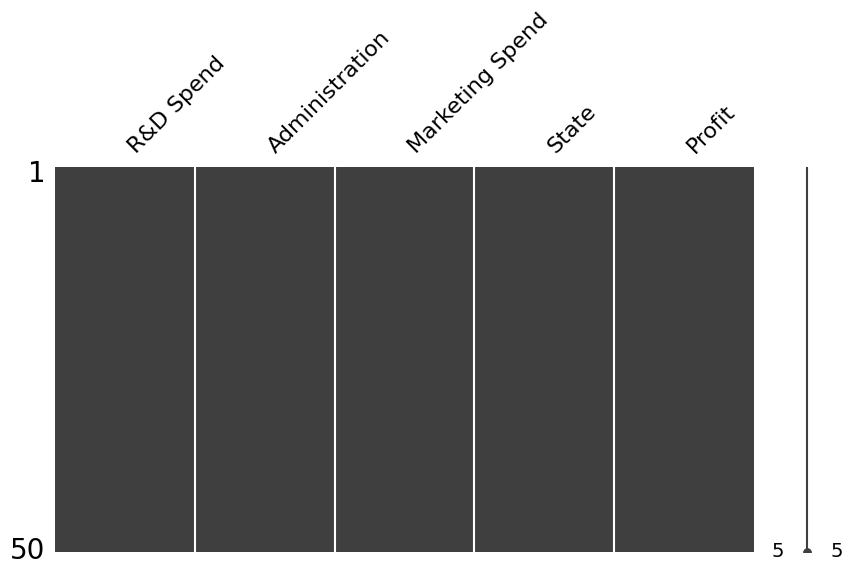

In [87]:
mso.matrix(df, figsize=(10,5))

- find information of about feature using visualization
- for complicated matplot we should use seaborn

In [88]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

<AxesSubplot: xlabel='Profit', ylabel='R&D Spend'>

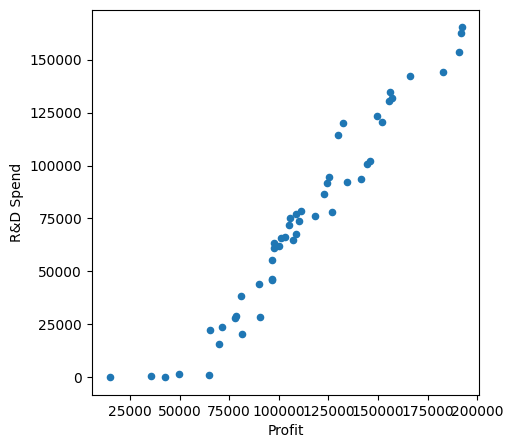

In [89]:
df.plot(kind='scatter',x='Profit',y='R&D Spend',figsize=(5,5))

<AxesSubplot: xlabel='Profit', ylabel='Administration'>

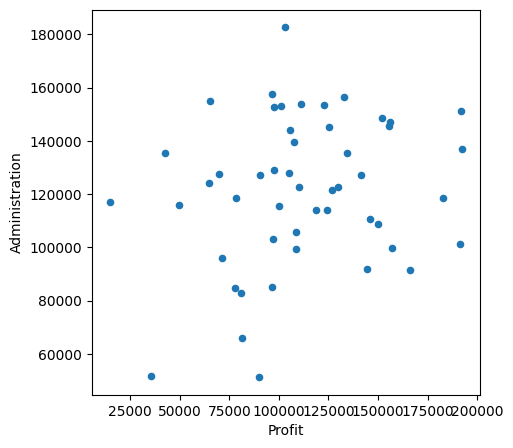

In [90]:
df.plot(kind='scatter',x='Profit',y='Administration',figsize=(5,5))

<AxesSubplot: xlabel='Profit', ylabel='Marketing Spend'>

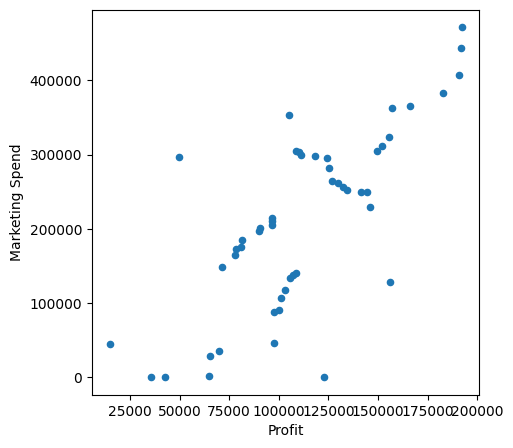

In [91]:
df.plot(kind='scatter',x='Profit',y='Marketing Spend',figsize=(5,5))

<AxesSubplot: xlabel='Administration', ylabel='Profit'>

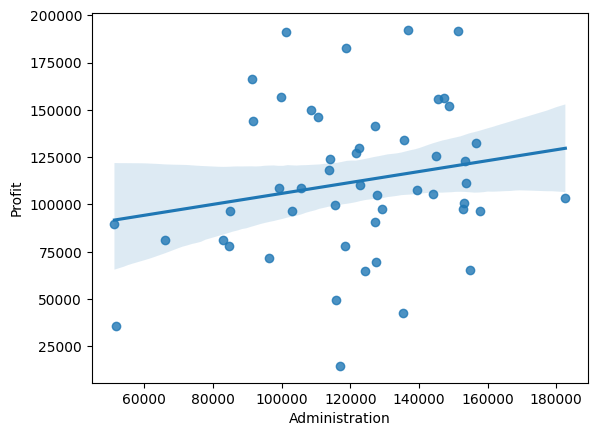

In [92]:
sns.regplot(x='Administration',y='Profit',data=df)

<AxesSubplot: xlabel='Marketing Spend', ylabel='Profit'>

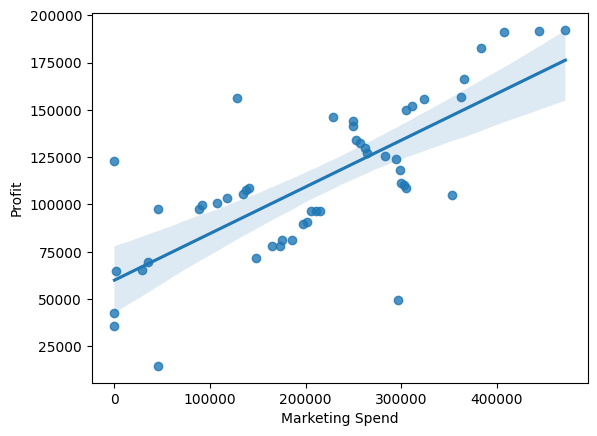

In [93]:
sns.regplot(x='Marketing Spend',y='Profit',data=df)

<AxesSubplot: xlabel='R&D Spend', ylabel='Profit'>

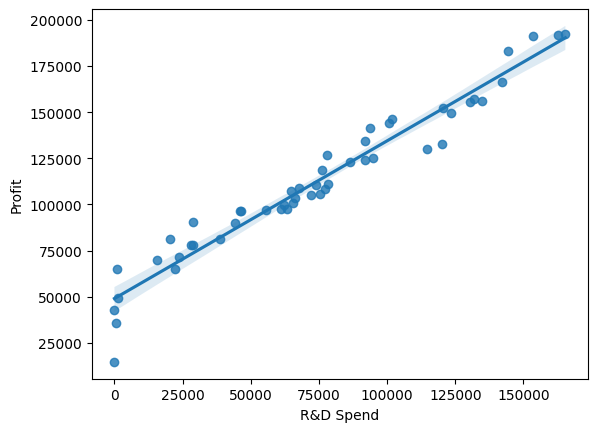

In [94]:
sns.regplot(x='R&D Spend',y='Profit',data=df)

<AxesSubplot: xlabel='State', ylabel='Profit'>

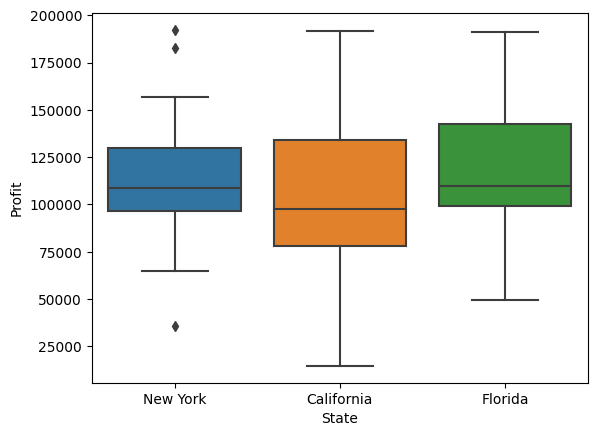

In [95]:
sns.boxplot(x='State',y='Profit',data=df)

In [96]:
df.corrwith(df['Profit'])

C:\Users\saroj\AppData\Local\Temp\ipykernel_14180\1042970508.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Profit'])


R&D Spend          0.972900
Administration     0.200717
Marketing Spend    0.747766
Profit             1.000000
dtype: float64

- If the the corelation value is grater that (>) .5 then feature is usefull (positive correlation)
- If the the corelation value is less that (<>) .5 then feature is usefull (negative correlation)
- 0.5 is called the correlation threshold
- If the value is between -.5 to .5 then the feature might not be usefull

In [97]:
X=df[['R&D Spend','Marketing Spend']]
y=df['Profit']

In [98]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X.values,y.values,train_size=.2,random_state=1)

In [99]:
from sklearn.pipeline import Pipeline

In [100]:
model = Pipeline(steps=[
    ('scale',StandardScaler()),
    ('reg',LinearRegression())

])

In [101]:
model.fit(Xtrain, ytrain)

Pipeline(steps=[('scale', StandardScaler()), ('reg', LinearRegression())])

In [102]:
ypred = model.predict(Xtest)
print(f'Acc: {r2_score(ytest,ypred)}')
print(f'MSE: {mean_squared_error(ytest,ypred)}')
print(f'MAE: {mean_absolute_error(ytest,ypred)}')

Acc: 0.8853033254794178
MSE: 177796093.84262955
MAE: 9797.144685258492


Visualization

In [103]:
vis=pd.DataFrame([ytest,ypred], index=['ytest','ypred'])

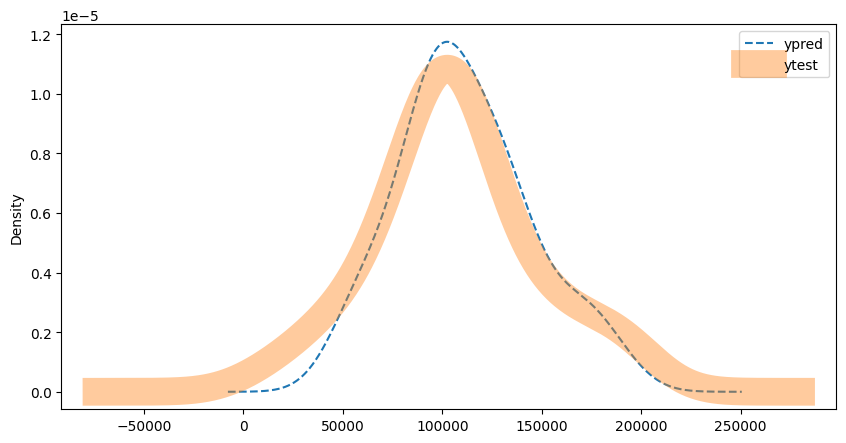

In [104]:
ax=vis.T.plot(kind='kde',x='ytest',linestyle='--',figsize=(10,5))
vis.T.plot(kind='kde',linewidth=20,alpha=.4,x='ypred',ax=ax)
plt.show()

save ur model

In [105]:
dump(model,'startup_profit_regrassion_v1.jb')

['startup_profit_regrassion_v1.jb']

loaded ur model

In [106]:
loaded_model = load('startup_profit_regrassion_v1.jb')

In [110]:
r = 200000
m = 500000
x_inp=np.array([[r,m]])
loaded_model.predict(x_inp)

array([211720.02815935])